In [58]:
import pandas as pd
from sklearn.model_selection import RepeatedStratifiedKFold,StratifiedKFold, cross_val_score, cross_validate
from skopt import BayesSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import loguniform
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
df= pd.read_csv( 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv',header=None)
x,y=df.iloc[:, :-1], df.iloc[:,-1]
x.shape,y.shape
model=LogisticRegression(max_iter=400)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1, shuffle=True)
cv=RepeatedStratifiedKFold( n_splits=10, n_repeats=3, random_state=1)
space=dict()
space['solver']=['newton-cg', 'lbfgs', 'liblinear']
space['multi_class']= ['auto', 'ovr']
space['C'] = [10,20,30,40, 100]

#space['C'] = list(np.linspace(1, 100,20))
search=BayesSearchCV(model, space, n_iter=10, cv=cv, random_state=1, scoring='accuracy', optimizer_kwargs=dict(acq_func='LCB', base_estimator="GBRT"))
kf=StratifiedKFold(n_splits=10, random_state=7, shuffle=True)

print('Best Score: %s' % result.best_score_)
print('Best paramets: %s ' % result.best_params_)



Best Score: 0.7850490196078432
Best paramets: OrderedDict([('C', 20), ('multi_class', 'ovr'), ('solver', 'liblinear')]) 


In [62]:
from sklearn.datasets import load_boston

boston=load_boston()
boston.target

/Users/marziehbaes/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [34]:
model=LogisticRegression(C=20, solver='liblinear', multi_class='ovr')

re=model.fit(xtrain,ytrain)
pr=model.predict(xtest)
score=accuracy_score(ytest,pr)
print(score)

0.7619047619047619


<AxesSubplot:title={'center':'Convergence plot'}, xlabel='Number of calls $n$', ylabel='$\\min f(x)$ after $n$ calls'>

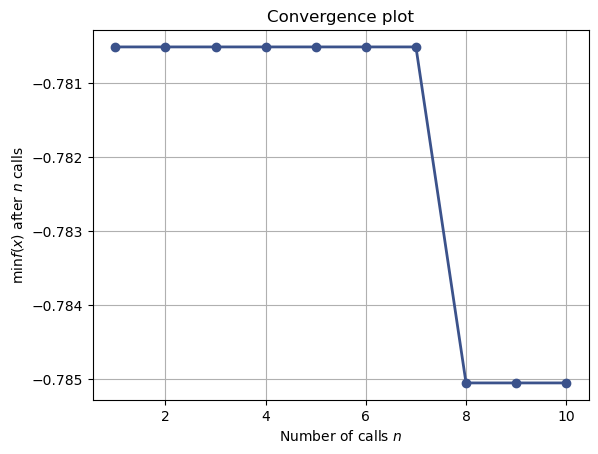

In [35]:
from skopt.utils import create_result

from skopt.plots import plot_convergence, plot_evaluations, plot_objective
opt = search.optimizers_[0]

r = create_result(opt.Xi, opt.yi, opt.space, opt.rng, models=opt.models)
plot_convergence(r)


array([[<AxesSubplot:xlabel='C', ylabel='Number of samples'>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:ylabel='multi_class'>,
        <AxesSubplot:xlabel='multi_class', ylabel='Number of samples'>,
        <AxesSubplot:>],
       [<AxesSubplot:xlabel='C', ylabel='solver'>,
        <AxesSubplot:xlabel='multi_class'>,
        <AxesSubplot:xlabel='solver', ylabel='Number of samples'>]],
      dtype=object)

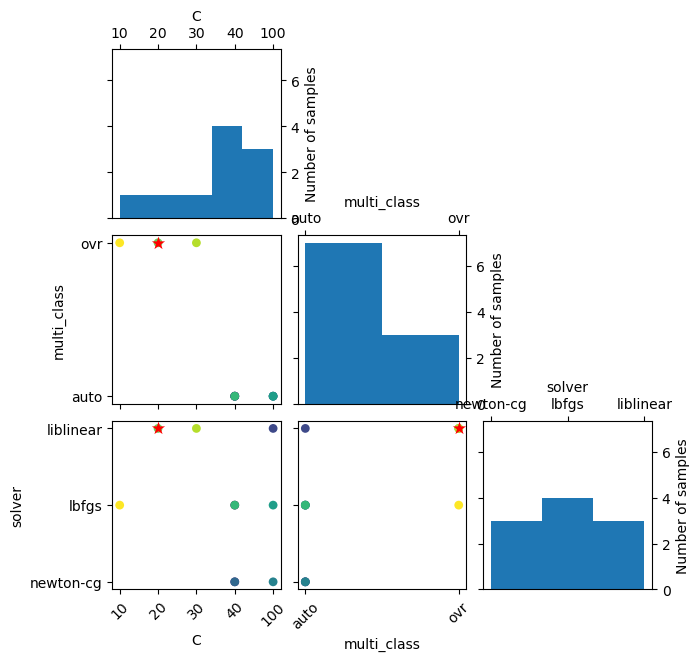

In [36]:
plot_evaluations(r)


array([[<AxesSubplot:xlabel='C', ylabel='Partial dependence'>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:ylabel='multi_class'>,
        <AxesSubplot:xlabel='multi_class', ylabel='Partial dependence'>,
        <AxesSubplot:>],
       [<AxesSubplot:xlabel='C', ylabel='solver'>,
        <AxesSubplot:xlabel='multi_class'>,
        <AxesSubplot:xlabel='solver', ylabel='Partial dependence'>]],
      dtype=object)

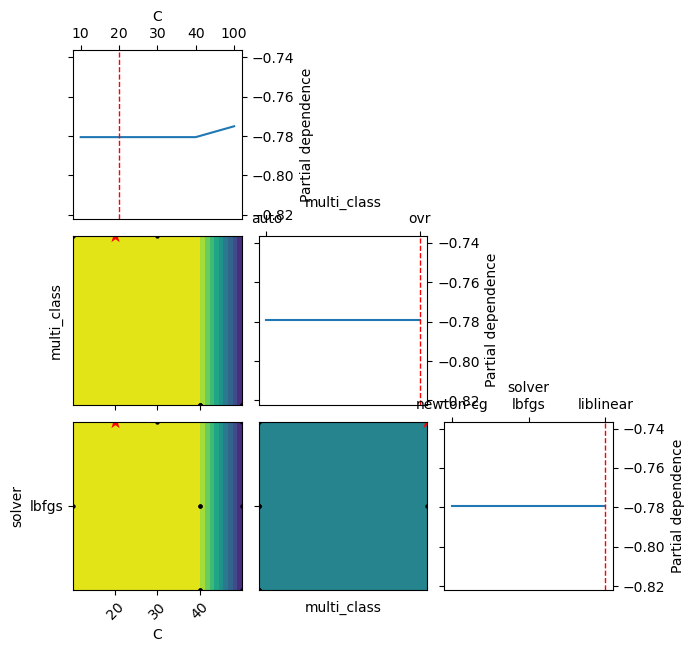

In [37]:
plot_objective(r)
